In [68]:
import viscid
viscid.calculator.evaluator.enabled = True
from viscid.plot import vpyplot as vlt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,10)

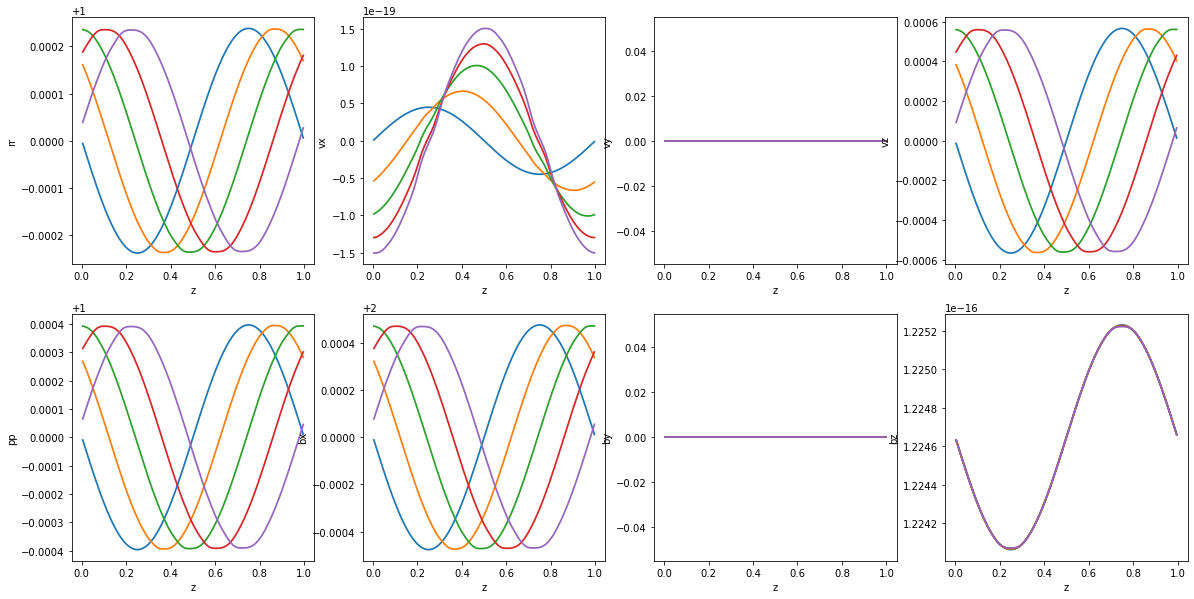

In [69]:
vf = viscid.load_file('/Users/kai/src/libmrc/mhd/tests/t001_ot/run.3d.xdmf', force_reload=True)
fig, ax = plt.subplots(2, 4)
for t in range(5):
  vf.activate_time(5*t)
  vlt.plot(vf['rr'], ax=ax[0][0])
  vlt.plot(vf['vx'], ax=ax[0][1])
  vlt.plot(vf['vy'], ax=ax[0][2])
  vlt.plot(vf['vz'], ax=ax[0][3])
  vlt.plot(vf['pp'], ax=ax[1][0])
  vlt.plot(vf['bx'], ax=ax[1][1])
  vlt.plot(vf['by'], ax=ax[1][2])
  vlt.plot(vf['bz'], ax=ax[1][3])

vA = 2.0 vS = 1.2909944487358056 vp = 2.3804761428476167


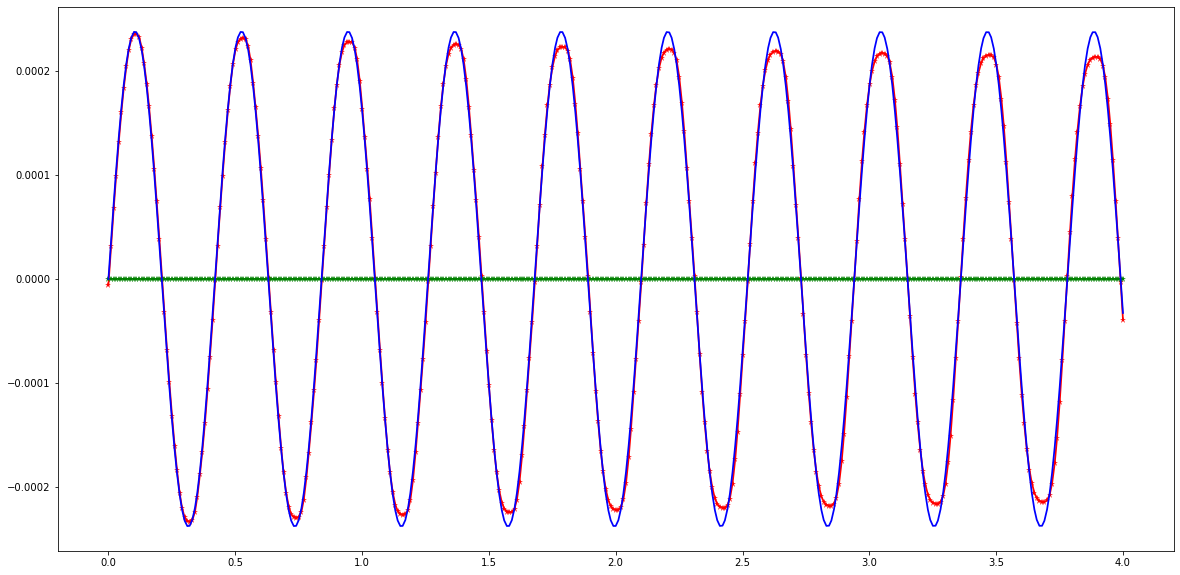

In [71]:
B0 = 2
rr0 = 1
pp0 = 1
gamma = 5./3.
theta = 90 * 2*np.pi/360
k = 2*np.pi

vA = np.sqrt(B0**2 / rr0)
vS = np.sqrt(gamma * pp0/rr0)
vp = np.sqrt(.5 * (vA**2 + vS**2 + np.sqrt((vA**2 + vS**2)**2 - 4 * vA**2 * vS**2 * np.cos(theta)**2)))
print("vA = {} vS = {} vp = {}".format(vA, vS, vp))

#om = k * vA * np.cos(theta) # alfven
om = k * vp # fast
fields = ['vx', 'vy', 'vz', 'bx', 'by', 'bz', 'rr', 'pp']

times = []
values = { f: [] for f in fields }
#times, values = [], {'vy':[], 'by':[]}
for d in vf.get_times():
    times.append(d.time)
    for f in fields:
        values[f].append(d[f][0,0,0])
times = np.array(times)
for f in values:
    values[f] = np.array(values[f])
plt.plot(times, values['rr']-1, '*-r');
plt.plot(times, values['vx'], '*-g');
plt.plot(times, 1e-4*vp*np.sin(om*times), '-b');